In [104]:
import pandas as pd
df = pd.read_csv("bootcamp_orders.csv")
df2 = pd.read_csv("bootcamp_customers.csv")
print(df.shape)
print(df2.shape)

df.duplicated('order_id').sum()

df.isna().sum()
df2.isna().sum()

(31, 10)
(12, 6)


customer_id      0
customer_name    0
age              1
city             1
signup_date      0
segment          0
dtype: int64

In [105]:
import pandas as pd
df = pd.read_csv("bootcamp_orders.csv")
df.duplicated("order_id").sum()
df = df.drop_duplicates(subset="order_id", keep="first")
df.duplicated("order_id").sum()

df['discount_rate'] = df['discount_rate'].fillna(0)
df["revenue"] = df["unit_price"] * df["quantity"] * (1 - df["discount_rate"])
revennue_sum = df["revenue"].sum()

print(len(df))
print(revennue_sum)

30
209830.0


In [106]:
# #19
# df.isna().sum()

In [107]:
# import seaborn as sns
# import pandas as pd
# import seaborn as sns

# df = pd.read_csv("bootcamp_orders.csv")
# df2 = pd.read_csv("bootcamp_customers.csv")

# #
# category_revennue_sum = df.groupby("category")["안돼시간이

# plt.figure(figsize=(12,3))
# sns.barplot(data=df, x='category', y='revennue_sum')
# plt.title("Total Revenue by category")
# plt.show

In [ ]:
###오답노트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("bootcamp_customers.csv")
orders = pd.read_csv("bootcamp_orders.csv")

###

#19번
#left marged 
merged_df = pd.merge(df, customers, on="customer_id", how="left")
merged_df['city'] = merged_df['city'].fillna("UNKNOWN") #결측치 처리

city_summary = merged_df.groupby('city').agg(
    order_cnt=('order_id', 'nunique'),
    customer_cnt=('customer_id', 'nunique'),
    revenue_sum=('revenue', 'sum')
).reset_index()

#정렬 (매출액 내림차순, 도시명 오름차순)
city_summary = city_summary.sort_values(by=['revenue_sum', 'city'], ascending=[False, True])

print(city_summary)

      city  order_cnt  customer_cnt  revenue_sum
4    SEOUL         10             4      61120.0
0    BUSAN          7             3      45420.0
3  INCHEON          3             1      32240.0
1    DAEGU          4             2      29840.0
2  GWANGJU          3             1      26910.0
5  UNKNOWN          3             2      14300.0


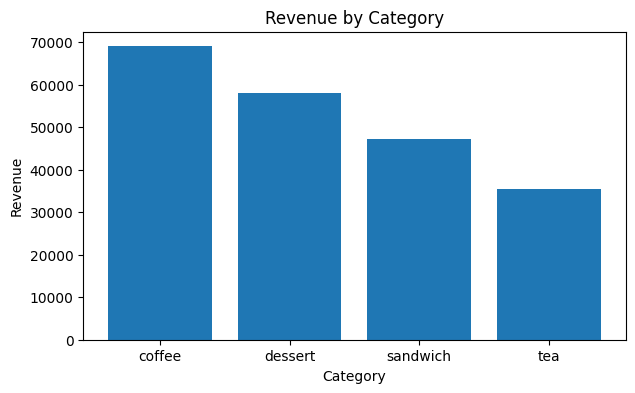

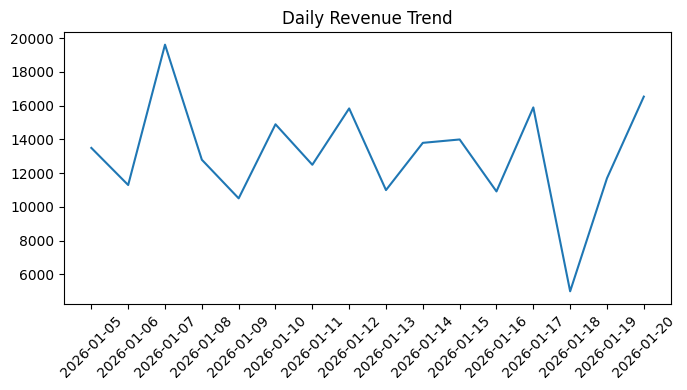

: 

In [ ]:
#20
import matplotlib.pyplot as plt
import seaborn as sns

#bar plot
category_revenue = merged_df.groupby('category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(7, 4))
plt.bar(category_revenue.index, category_revenue.values)
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

# line plot
daily_revenue = merged_df.groupby('order_date')['revenue'].sum()

plt.figure(figsize=(7, 4))
plt.plot(daily_revenue.index, daily_revenue.values)
plt.title('Daily Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()